In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras import layers, models
import requests
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt
from tqdm import tqdm

2023-12-06 22:08:32.349931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Загрузка и подготовка данных
from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/Project/DataSetCyrillic"

Mounted at /content/drive


In [3]:
# размер изображений 28 на 28 => входной вектор длины 784
labels = []
images = []

for folder in tqdm(os.listdir('DataSetCyrillic/DataSetCyrillic')):
    if (folder != '.DS_Store'):
        for filename in os.listdir(os.path.join('DataSetCyrillic/DataSetCyrillic', folder)):
            img_path = os.path.join('DataSetCyrillic/DataSetCyrillic', folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = img / 255  # Нормализация значений пикселей
            label = ord(folder[0]) - ord('А')
            images.append(img)
            labels.append(label)

100%|███████████████████████████████████████████| 64/64 [00:02<00:00, 28.09it/s]


In [4]:
# Преобразование в массив numpy
images = np.array(images)
labels = np.array(labels)

In [150]:
from collections import Counter

Counter(labels)

Counter({1: 197,
         20: 196,
         6: 196,
         19: 196,
         58: 196,
         35: 196,
         15: 196,
         29: 196,
         8: 392,
         42: 196,
         60: 196,
         59: 196,
         14: 196,
         7: 196,
         18: 196,
         0: 196,
         32: 196,
         21: 196,
         50: 196,
         56: 196,
         5: 392,
         49: 196,
         53: 196,
         63: 196,
         54: 196,
         46: 196,
         36: 196,
         45: 196,
         39: 196,
         16: 196,
         2: 196,
         23: 196,
         30: 196,
         44: 196,
         11: 196,
         25: 196,
         12: 196,
         38: 196,
         24: 196,
         13: 196,
         31: 196,
         10: 196,
         3: 199,
         22: 196,
         4: 196,
         47: 196,
         17: 196,
         37: 392,
         55: 196,
         61: 196,
         52: 196,
         62: 196,
         48: 196,
         51: 196,
         57: 196,
         43: 196,
 

In [8]:
# Разделение данных на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [10]:
x_test[0].shape

(28, 28)

In [11]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [12]:
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Добавлен сверточный слой
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # скрытый слой 128 нейронов
model.add(Dropout(0.5))  # Добавлен слой Dropout
model.add(layers.Dense(66, activation='softmax'))  # выходной 63 нейрона (33 буквы, из них все, кроме ъ, ы, ь в двух вариантах (большая и маленькая))
# 66 для краткости

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_split=0.2)

Epoch 1/20
495/495 [==============================] - 5s 9ms/step - loss: 3.8218 - accuracy: 0.0727 - val_loss: 2.9965 - val_accuracy: 0.2180
Epoch 2/20
495/495 [==============================] - 4s 8ms/step - loss: 2.7397 - accuracy: 0.2274 - val_loss: 1.8429 - val_accuracy: 0.5185
Epoch 3/20
495/495 [==============================] - 4s 8ms/step - loss: 2.0290 - accuracy: 0.3851 - val_loss: 1.3417 - val_accuracy: 0.6571
Epoch 4/20
495/495 [==============================] - 4s 9ms/step - loss: 1.6408 - accuracy: 0.4934 - val_loss: 1.0265 - val_accuracy: 0.7314
Epoch 5/20
495/495 [==============================] - 4s 9ms/step - loss: 1.3674 - accuracy: 0.5676 - val_loss: 0.7870 - val_accuracy: 0.7729
Epoch 6/20
495/495 [==============================] - 4s 9ms/step - loss: 1.1977 - accuracy: 0.6179 - val_loss: 0.6514 - val_accuracy: 0.8108
Epoch 7/20
495/495 [==============================] - 4s 9ms/step - loss: 1.0704 - accuracy: 0.6508 - val_loss: 0.5885 - val_accuracy: 0.8376
Epoch 

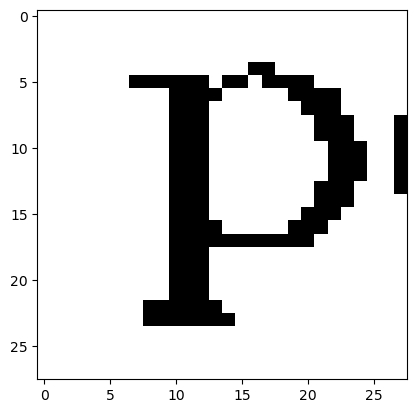

1/1 [==============================] - 0s 18ms/step
[[1.0129330e-33 3.7925320e-31 1.2308964e-26 6.2499249e-29 4.1828328e-29
  1.2267915e-31 8.0670924e-19 0.0000000e+00 1.3280512e-18 7.0971782e-38
  1.0994098e-20 2.6220476e-36 1.9515764e-20 8.7560563e-24 1.0037570e-22
  7.5397459e-35 1.7070102e-24 9.0893566e-29 0.0000000e+00 1.3315637e-30
  9.9209950e-18 1.5479929e-28 1.9624340e-32 4.7396053e-30 8.8323725e-17
  1.0197862e-21 1.0192732e-35 4.8097815e-38 0.0000000e+00 0.0000000e+00
  2.2031000e-11 3.9670829e-33 4.9213566e-33 2.3162605e-38 3.4492866e-21
  8.2173944e-25 1.3269611e-35 2.8764226e-18 1.3299876e-11 0.0000000e+00
  4.5406106e-11 2.2781689e-37 7.1451347e-09 2.8644325e-33 6.4641814e-10
  1.4605696e-14 0.0000000e+00 5.1641739e-25 1.1695308e-19 2.0453667e-28
  2.4503906e-12 3.4846015e-19 2.1567043e-15 1.7403012e-22 2.3981401e-25
  1.1865521e-21 1.3906035e-07 1.4396106e-14 1.0737311e-31 2.4339606e-09
  6.3922672e-19 0.0000000e+00 9.9999988e-01 1.2231745e-24 0.0000000e+00
  3.4970491e

In [146]:
n = 109

img = cv2.imread('app/1.png', cv2.IMREAD_GRAYSCALE)
img = img / 255
img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
_,img = cv2.threshold (img, 0.7,1, cv2.THRESH_BINARY)
plt.imshow(img, cmap='gray')
plt.show()
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print(f'Распознанная буква: {chr(int(np.argmax(res)) + ord("А"))}')
print(img)